In [1]:
#LETS WORK WITH CIFAR 10 DATA 

# OBJECTIVE 

Train CIFAR 10 with RESNET using Augmentation technique :Albumentation,GRADCAM ,CUTOUT 

->Move your last code's transformations to Albumentations. Apply ToTensor, HorizontalFlip, Normalize (at min) + More (for additional points)

->Please make sure that your test_transforms are simple and only using ToTensor and Normalize

->Implement GradCam function as a module. 

->Your final code (notebook file) must use imported functions to implement transformations and GradCam functionality

->Target Accuracy is 87%
 

In [2]:
#STEP1:Install Albumentation

In [3]:
!pip install -U albumentations

Requirement already up-to-date: albumentations in /usr/local/lib/python3.7/dist-packages (0.5.2)


In [4]:
#STEP 2 :Import in built library 
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import numpy as np
import torchvision
from torchvision.datasets import CIFAR10
from torchvision.transforms import ToTensor




In [5]:
#STEP 3 : DELETE OLD GIT FOLDER AND CLONE NEW ONE 
%rm -r /content/SWAG_DNN
!git clone https://github.com/jitendramishra1024/SWAG_DNN.git
%cd SWAG_DNN

Cloning into 'SWAG_DNN'...
remote: Enumerating objects: 115, done.
remote: Counting objects: 100% (115/115), done.
remote: Compressing objects: 100% (82/82), done.
remote: Total 115 (delta 62), reused 78 (delta 30), pack-reused 0
Receiving objects: 100% (115/115), 206.66 KiB | 10.33 MiB/s, done.
Resolving deltas: 100% (62/62), done.
/content/SWAG_DNN


In [6]:
#STEP 4 :import userdefined library

from SWAG_DNN.utils import Dataloader 
from SWAG_DNN.utils import show_images
from SWAG_DNN.utils import classcount
from SWAG_DNN.utils import perClassResult
from SWAG_DNN.utils import plot_misclassified_image
from SWAG_DNN.utils import useful_utils
from SWAG_DNN.utils import gradcam
from SWAG_DNN.utils import Albumentations
from SWAG_DNN.models import BasicModel
from SWAG_DNN.models import RESNET
from SWAG_DNN.trainer import train
from SWAG_DNN.trainer import test

In [7]:
#STEP :5 Define parameters 

class Args:

    # Data Loading
    # ============

    # train_batch_size = 64
    # val_batch_size = 64
    num_workers = 4
    batch_size = 128


    # Regularization
    # ==============
    dropout = 0
    lambda_l2=5e-4
    lambda_l1=0

    # Training
    # ========
    random_seed = 1
    epochs = 30
    learning_rate = 0.01
    momentum = 0.9
    step_size=12


In [8]:
#get mean and standard deviation of images 

trainset = torchvision.datasets.CIFAR10(root='./data',download=True,transform=transforms.ToTensor())
mean,std = Dataloader.calculate_mean_std(trainset)

# mean =[0.5,0.5,0.5]
# std =[0.5,0.5,0.5]


Extracting ./data/cifar-10-python.tar.gz to ./data


In [9]:
train_transform_album = Albumentations.album_compose_train(mean,std)
test_transform_album = Albumentations.album_compose_test(mean,std)

trainloader,testloader=Dataloader.train_test_loader_with_Albumentation(Args.batch_size,Args.num_workers,train_transform_album,test_transform_album)
classes = Dataloader.get_classes()

Files already downloaded and verified
Files already downloaded and verified
CUDA Available? True


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integ

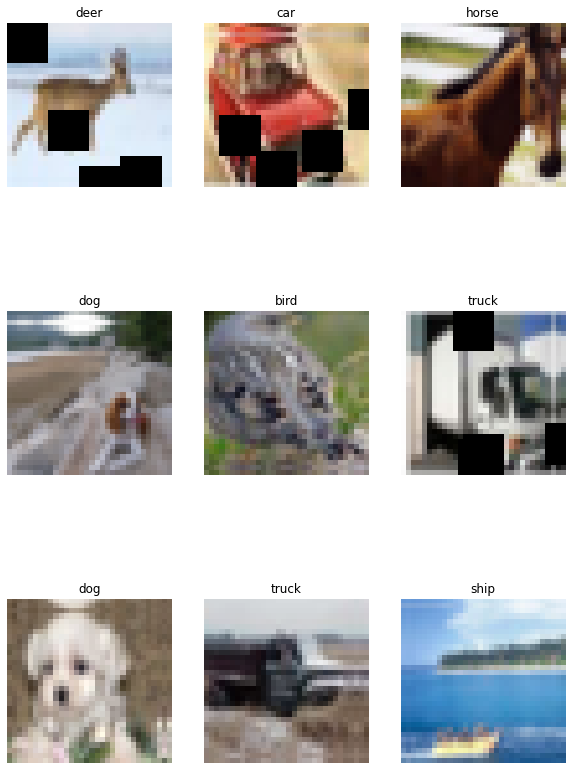

In [10]:
#plot  n raw images 
#make sure n is a squared number 
show_images.plot_n_image(9,trainloader,classes,mean,std,format='raw')


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integ

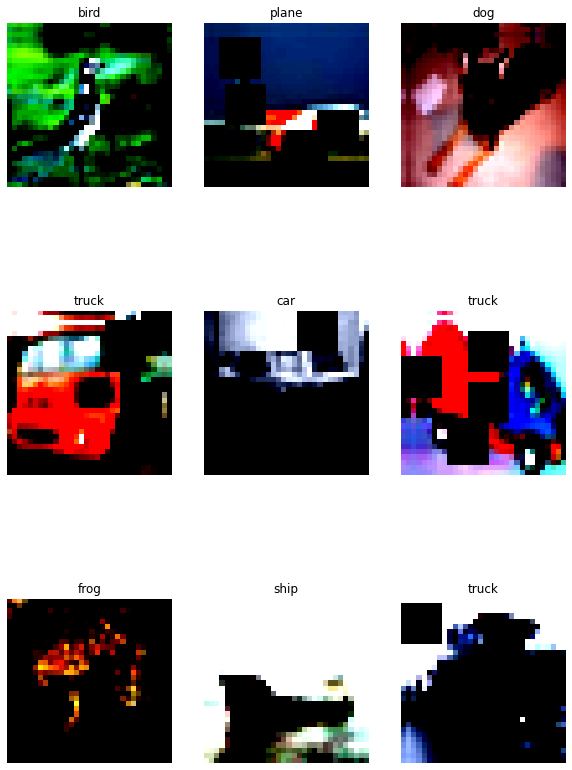

In [11]:
#plot  n normalized images 
#make sure n is a squared number 
show_images.plot_n_image(9,trainloader,classes,mean,std,format='normalized')

In [12]:

dataset = CIFAR10(root='data/', download=True, transform=ToTensor())
class_count = classcount.get_train_class_count(dataset,classes)
print(class_count)

Files already downloaded and verified
{'frog': 5000, 'truck': 5000, 'deer': 5000, 'car': 5000, 'bird': 5000, 'horse': 5000, 'ship': 5000, 'cat': 5000, 'dog': 5000, 'plane': 5000}


In [13]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)

#working 
#model = BasicModel.Net().to(device)


model = RESNET.ResNet18().to(device) 
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1,

In [14]:

import torch.optim as optim
from torch.optim.lr_scheduler import StepLR
lossfunc = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=Args.learning_rate, momentum=Args.momentum,weight_decay=Args.lambda_l2)
scheduler = StepLR(optimizer, step_size=Args.step_size, gamma=0.1)

In [15]:
#Test
EPOCHS = Args.epochs

trainer = train.Trainer()
tester  = test.Tester()

for epoch in range(EPOCHS):
  print("EPOCH:", epoch+1, "last LR=",scheduler.get_last_lr(), "CURRENT LR = ", scheduler.get_lr())
  trainer.train(model, device, trainloader, optimizer, lossfunc, epoch, Args.lambda_l1)
  scheduler.step()
  tester.test(model, device, testloader)

test_losses,test_acc=tester.getValuesTest()
train_losses,train_acc=trainer.getValuesTrain()


/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:370: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  "please use `get_last_lr()`.", UserWarning)
  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 1 last LR= [0.01] CURRENT LR =  [0.01]


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Train set: Loss=0.9009166955947876 Batch_id=390 Accuracy=47.27: 100%|██████████| 391/391 [00:41<00:00,  9.47it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -4.2815, Test Accuracy: 5644/10000 (56.44%)

EPOCH: 2 last LR= [0.01] CURRENT LR =  [0.01]


Train set: Loss=0.6757059693336487 Batch_id=390 Accuracy=65.06: 100%|██████████| 391/391 [00:41<00:00,  9.39it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -4.8456, Test Accuracy: 6224/10000 (62.24%)

EPOCH: 3 last LR= [0.01] CURRENT LR =  [0.01]


Train set: Loss=0.5828343033790588 Batch_id=390 Accuracy=72.99: 100%|██████████| 391/391 [00:41<00:00,  9.39it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -6.1724, Test Accuracy: 7517/10000 (75.17%)

EPOCH: 4 last LR= [0.01] CURRENT LR =  [0.01]


Train set: Loss=0.6429467797279358 Batch_id=390 Accuracy=76.82: 100%|██████████| 391/391 [00:41<00:00,  9.38it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -6.4532, Test Accuracy: 7478/10000 (74.78%)

EPOCH: 5 last LR= [0.01] CURRENT LR =  [0.01]


Train set: Loss=0.5740986466407776 Batch_id=390 Accuracy=79.44: 100%|██████████| 391/391 [00:41<00:00,  9.52it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -7.6252, Test Accuracy: 8198/10000 (81.98%)

EPOCH: 6 last LR= [0.01] CURRENT LR =  [0.01]


Train set: Loss=0.4782540202140808 Batch_id=390 Accuracy=81.66: 100%|██████████| 391/391 [00:41<00:00,  9.43it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -7.6323, Test Accuracy: 8301/10000 (83.01%)

EPOCH: 7 last LR= [0.01] CURRENT LR =  [0.01]


Train set: Loss=0.6064857244491577 Batch_id=390 Accuracy=83.17: 100%|██████████| 391/391 [00:41<00:00,  9.37it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -8.2723, Test Accuracy: 8325/10000 (83.25%)

EPOCH: 8 last LR= [0.01] CURRENT LR =  [0.01]


Train set: Loss=0.348214328289032 Batch_id=390 Accuracy=84.20: 100%|██████████| 391/391 [00:41<00:00,  9.36it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -8.4483, Test Accuracy: 8183/10000 (81.83%)

EPOCH: 9 last LR= [0.01] CURRENT LR =  [0.01]


Train set: Loss=0.5406254529953003 Batch_id=390 Accuracy=85.24: 100%|██████████| 391/391 [00:42<00:00,  9.27it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -8.6545, Test Accuracy: 8488/10000 (84.88%)

EPOCH: 10 last LR= [0.01] CURRENT LR =  [0.01]


Train set: Loss=0.5463308095932007 Batch_id=390 Accuracy=86.43: 100%|██████████| 391/391 [00:41<00:00,  9.32it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -9.1539, Test Accuracy: 8546/10000 (85.46%)

EPOCH: 11 last LR= [0.01] CURRENT LR =  [0.01]


Train set: Loss=0.460781991481781 Batch_id=390 Accuracy=87.25: 100%|██████████| 391/391 [00:41<00:00,  9.38it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -9.3868, Test Accuracy: 8524/10000 (85.24%)

EPOCH: 12 last LR= [0.01] CURRENT LR =  [0.01]


Train set: Loss=0.3623286783695221 Batch_id=390 Accuracy=87.92: 100%|██████████| 391/391 [00:41<00:00,  9.44it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -9.0964, Test Accuracy: 8337/10000 (83.37%)

EPOCH: 13 last LR= [0.001] CURRENT LR =  [0.0001]


Train set: Loss=0.3138132095336914 Batch_id=390 Accuracy=91.51: 100%|██████████| 391/391 [00:41<00:00,  9.40it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -10.3856, Test Accuracy: 9030/10000 (90.30%)

EPOCH: 14 last LR= [0.001] CURRENT LR =  [0.001]


Train set: Loss=0.28678062558174133 Batch_id=390 Accuracy=92.58: 100%|██████████| 391/391 [00:41<00:00,  9.37it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -10.5741, Test Accuracy: 9060/10000 (90.60%)

EPOCH: 15 last LR= [0.001] CURRENT LR =  [0.001]


Train set: Loss=0.25939828157424927 Batch_id=390 Accuracy=93.07: 100%|██████████| 391/391 [00:41<00:00,  9.34it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -10.6787, Test Accuracy: 9082/10000 (90.82%)

EPOCH: 16 last LR= [0.001] CURRENT LR =  [0.001]


Train set: Loss=0.14395122230052948 Batch_id=390 Accuracy=93.45: 100%|██████████| 391/391 [00:41<00:00,  9.39it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -10.8131, Test Accuracy: 9081/10000 (90.81%)

EPOCH: 17 last LR= [0.001] CURRENT LR =  [0.001]


Train set: Loss=0.1078372448682785 Batch_id=390 Accuracy=93.63: 100%|██████████| 391/391 [00:42<00:00,  9.27it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -10.9499, Test Accuracy: 9089/10000 (90.89%)

EPOCH: 18 last LR= [0.001] CURRENT LR =  [0.001]


Train set: Loss=0.2289876937866211 Batch_id=390 Accuracy=94.00: 100%|██████████| 391/391 [00:41<00:00,  9.38it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -11.1188, Test Accuracy: 9081/10000 (90.81%)

EPOCH: 19 last LR= [0.001] CURRENT LR =  [0.001]


Train set: Loss=0.2158021181821823 Batch_id=390 Accuracy=93.91: 100%|██████████| 391/391 [00:41<00:00,  9.34it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -11.2247, Test Accuracy: 9108/10000 (91.08%)

EPOCH: 20 last LR= [0.001] CURRENT LR =  [0.001]


Train set: Loss=0.18818634748458862 Batch_id=390 Accuracy=94.19: 100%|██████████| 391/391 [00:41<00:00,  9.35it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -11.3309, Test Accuracy: 9108/10000 (91.08%)

EPOCH: 21 last LR= [0.001] CURRENT LR =  [0.001]


Train set: Loss=0.18538986146450043 Batch_id=390 Accuracy=94.54: 100%|██████████| 391/391 [00:42<00:00,  9.11it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -11.3813, Test Accuracy: 9113/10000 (91.13%)

EPOCH: 22 last LR= [0.001] CURRENT LR =  [0.001]


Train set: Loss=0.23014429211616516 Batch_id=390 Accuracy=94.42: 100%|██████████| 391/391 [00:43<00:00,  9.07it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -11.4269, Test Accuracy: 9117/10000 (91.17%)

EPOCH: 23 last LR= [0.001] CURRENT LR =  [0.001]


Train set: Loss=0.17636416852474213 Batch_id=390 Accuracy=94.75: 100%|██████████| 391/391 [00:42<00:00,  9.12it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -11.5535, Test Accuracy: 9119/10000 (91.19%)

EPOCH: 24 last LR= [0.001] CURRENT LR =  [0.001]


Train set: Loss=0.08033832907676697 Batch_id=390 Accuracy=94.83: 100%|██████████| 391/391 [00:42<00:00,  9.14it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -11.5287, Test Accuracy: 9118/10000 (91.18%)

EPOCH: 25 last LR= [0.0001] CURRENT LR =  [1e-05]


Train set: Loss=0.08130480349063873 Batch_id=390 Accuracy=95.32: 100%|██████████| 391/391 [00:42<00:00,  9.14it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -11.7077, Test Accuracy: 9144/10000 (91.44%)

EPOCH: 26 last LR= [0.0001] CURRENT LR =  [0.0001]


Train set: Loss=0.09425605833530426 Batch_id=390 Accuracy=95.56: 100%|██████████| 391/391 [00:42<00:00,  9.10it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -11.6331, Test Accuracy: 9150/10000 (91.50%)

EPOCH: 27 last LR= [0.0001] CURRENT LR =  [0.0001]


Train set: Loss=0.18864448368549347 Batch_id=390 Accuracy=95.46: 100%|██████████| 391/391 [00:42<00:00,  9.13it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -11.7453, Test Accuracy: 9145/10000 (91.45%)

EPOCH: 28 last LR= [0.0001] CURRENT LR =  [0.0001]


Train set: Loss=0.1983371526002884 Batch_id=390 Accuracy=95.57: 100%|██████████| 391/391 [00:42<00:00,  9.18it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -11.7644, Test Accuracy: 9148/10000 (91.48%)

EPOCH: 29 last LR= [0.0001] CURRENT LR =  [0.0001]


Train set: Loss=0.10733498632907867 Batch_id=390 Accuracy=95.55: 100%|██████████| 391/391 [00:42<00:00,  9.21it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -11.8157, Test Accuracy: 9145/10000 (91.45%)

EPOCH: 30 last LR= [0.0001] CURRENT LR =  [0.0001]


Train set: Loss=0.11047568172216415 Batch_id=390 Accuracy=95.61: 100%|██████████| 391/391 [00:41<00:00,  9.34it/s]



Test set: Average loss: -11.7644, Test Accuracy: 9153/10000 (91.53%)



In [16]:
new_train_acc,new_train_loss=useful_utils.modify_train_loss_accuracy_from_batch_level_to_epoch_level(train_acc,train_losses,trainloader)

train_acc_mod=new_train_acc
train_losses_mod=new_train_loss
len(train_acc_mod),len(train_losses_mod),len(new_train_loss)

(30, 30, 30)

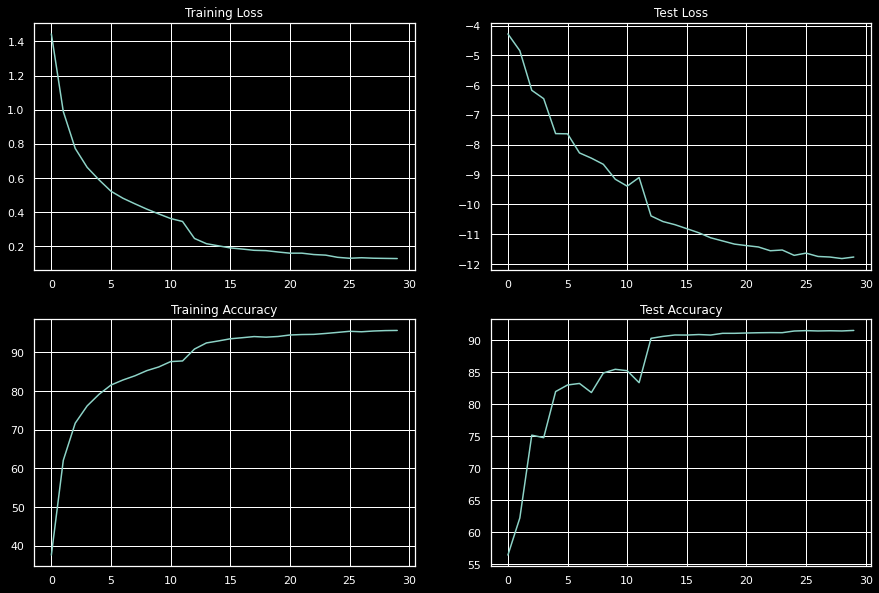

In [17]:
def plot_train_test_loss_accuracy(train_losses_mod,train_acc_mod,test_losses,test_acc):
  import seaborn as sns
  import matplotlib.pyplot as plt
  sns.set()
  plt.style.use("dark_background")

  fig, axs = plt.subplots(2,2,figsize=(15,10))
  axs[0, 0].plot(train_losses_mod)
  axs[0, 0].set_title("Training Loss")
  axs[1, 0].plot(train_acc_mod)
  axs[1, 0].set_title("Training Accuracy")
  axs[0, 1].plot(test_losses)
  axs[0, 1].set_title("Test Loss")
  axs[1, 1].plot(test_acc)
  axs[1, 1].set_title("Test Accuracy")
  plt.show()

plot_train_test_loss_accuracy(train_losses_mod,train_acc_mod,test_losses,test_acc)

In [18]:

torch.save(model,'./data/cifar')


In [19]:
#load the model
model = torch.load('./data/cifar')
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (shortcut): Sequential()
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=

In [20]:
#GET PERCENTAGE ACCURACY FOR EACH CLASS      
perClassResult.get_percent_acc_each_class(model,device,classes,testloader)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Accuracy of plane : 95 %
Accuracy of   car : 92 %
Accuracy of  bird : 86 %
Accuracy of   cat : 80 %
Accuracy of  deer : 90 %
Accuracy of   dog : 82 %
Accuracy of  frog : 90 %
Accuracy of horse : 95 %
Accuracy of  ship : 100 %
Accuracy of truck : 96 %


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integ

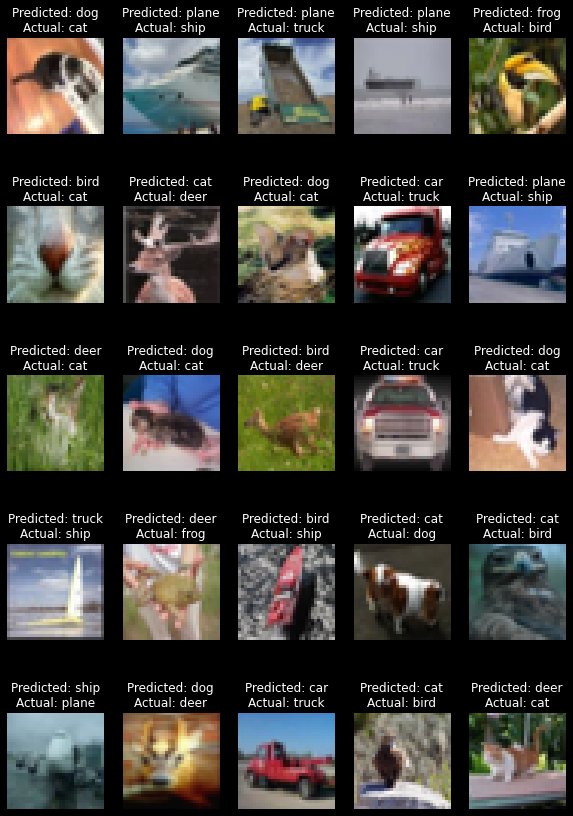

In [21]:
#Plot misclassified Image
plot_misclassified_image.plot_misclassified(25, testloader, device,model,classes,mean,std,format='raw')

In [22]:
## GRAD CAM 


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py:795: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3328: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


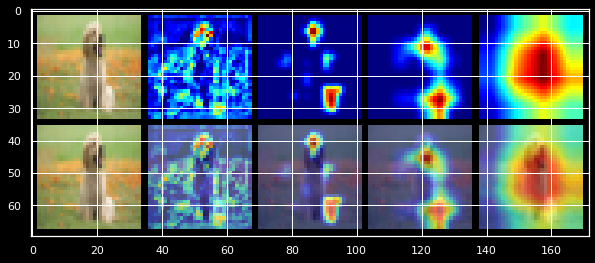

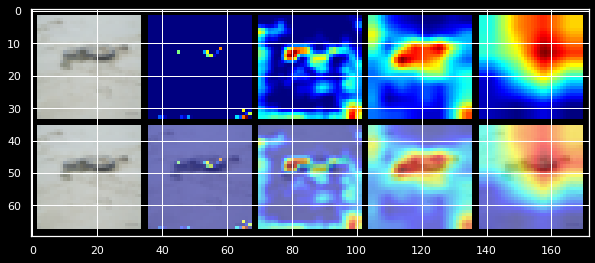

In [23]:
#GRAD CAM for user defined images
path='/content/SWAG_DNN/img'
import PIL
img_name =[path+'/dog.jpg',path+'/snake.jpg']
gradcam.grad_cam_for_user_defined_images(img_name,device,mean,std,model)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py:795: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3328: UserWarning: nn.functional.upsample is depr

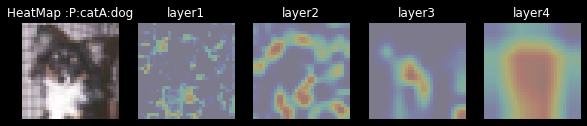

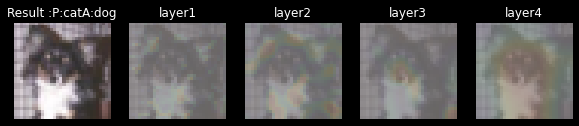

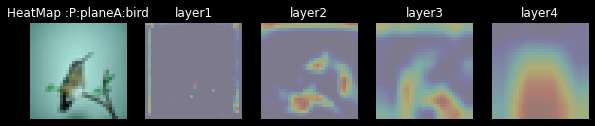

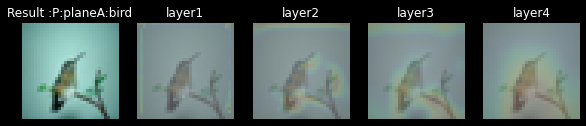

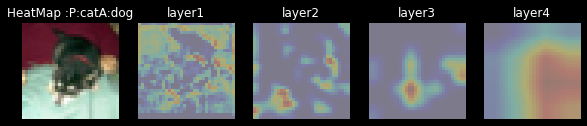

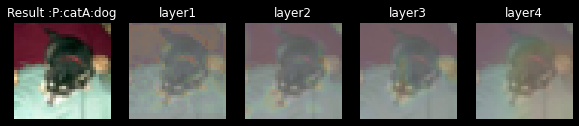

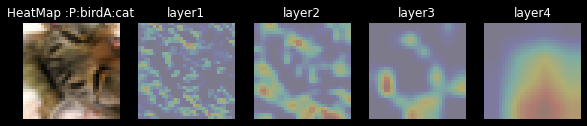

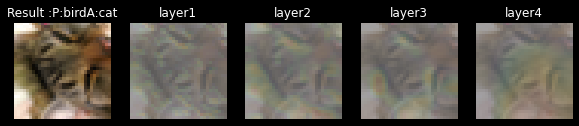

In [24]:
missed_images, predicted, actual = plot_misclassified_image.get_misclassified(model,testloader,device)

#lets see gradcam of  4 misclassified images 
gradcam.show_gradcam_for_n_images(4,missed_images,predicted,actual,classes,model,device,mean,std)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py:795: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3328: UserWarning: nn.functional.upsample is depr

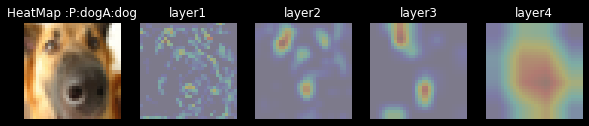

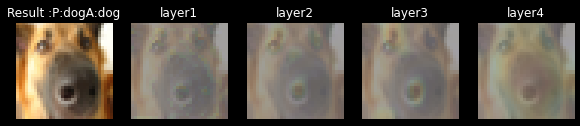

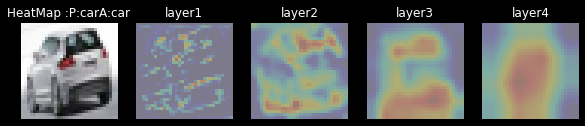

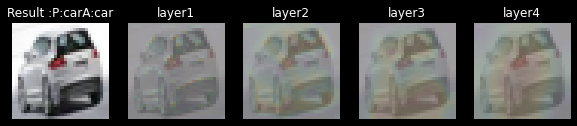

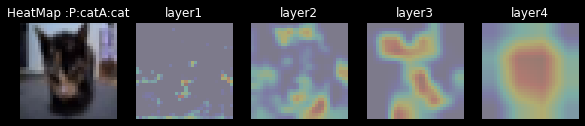

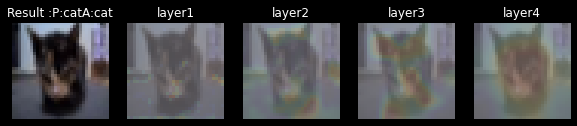

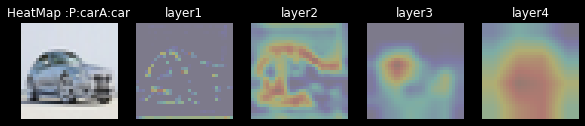

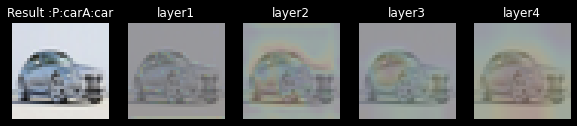

In [25]:
proper_images, predicted, actual = plot_misclassified_image.get_properclassified(model,testloader,device)

#lets see gradcam of  4 misclassified images 
gradcam.show_gradcam_for_n_images(4,proper_images,predicted,actual,classes,model,device,mean,std)